# Project: Investigate Cinema Correlations

<a id='toc'></a>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#review">Data Review and Wrangling</a></li>    
<li><a href="#transformations">Data Transformations</a></li>
<li><a href="#data_analysis">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>    
</ul>

<a id='intro'></a>
# Introduction
I chose to investigate the "The Movie Database" (TMDb) cinema dataset. As a movie lover, this dataset seemed the most appealing to me. My intent was to explore the data and see what information it contained, refine which information I was interested in, find correlations in that information, and gleam what observations I could to from it.
As with any data, it is essential to know where it came came from. A simple internet search gave me access to the following quote from the TMDb project's website:

**"Where did all of your data come from?**

*You! Since starting this project in 2008, we've been lucky enough to have users just like you add and edit
missing/incorrect data. Think of TMDb as a very specialised version of Wikipedia where everything is editable but very specialised around only movie, TV and actor data. We started with an initial data contribution from a project called omdb with only 10,000 movies in 2009. Everything added and edited since then has been users just like you!*

*In October 2013, we finally added TV. Since we didn't want to start with an empty database we opted to bring an intial import of data from Freebase. Freebase is made up of a number of different sources but primarily those from Wikipedia, The TVDb and TV Rage.*" ('https://www.themoviedb.org/faq/general', 6/2020)

In addition to that information, Udacity provides some initial facts about the dataset I chose. The following is from Udacity's project documentation:

* *"This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. "
* *"Certain columns, like 'cast' and 'genres,' contain multiple values separated by pipe (|) characters. "
* *"There are some odd characters in the 'cast' column. Don't worry about cleaning them. You can leave them as is." 
* *"The final two columns ending with "_adj" show the budget and revenue of the associated movie in terms of 2010 dollars, account." (https://video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf, 6/2020)

<a id='review'></a>
# Reviewing and Wrangling the Data
With some basics given to me, my next step was to explore the TMDb data. I started by displaying the top and bottom 3 rows using a Pandas data frame. I also defined the imports I will need for my analysis (updating these as needed). 

In [1]:
# Define Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import seaborn as sns

# Reconfigure dataframe display
pd.set_option('max_colwidth', 100) 
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.0f}'.format  # Suppress scientific notation and remove cents

# Load the data and print out a few lines.
print('Top 3 rows of data:')
movie_dframe = pd.read_csv('Data/tmdb-movies.csv')
pd.DataFrame(movie_dframe)[0:3]

Top 3 rows of data:


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,"Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning...",124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,5562,6,2015,137999939,1392445893
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,"An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape wher...",120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,5/13/15,6185,7,2015,137999939,348161292
2,262500,tt2908446,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dystopic future,Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,3/18/15,2480,6,2015,101199955,271619025


In [2]:
print('Bottom 3 rows of data:')
pd.DataFrame(movie_dframe)[-3:]

Bottom 3 rows of data:


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthief steals cars various crooks and never from the co...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6,1966,0,0
10864,21449,tt0061177,0,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the Japanese action film ""International Secret Police...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5,1966,0,0
10865,22293,tt0060666,0,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,"A family gets lost on the road and stumbles upon a hidden, underground, devil-worshiping cult le...",74,Horror,Norm-Iris,11/15/66,15,2,1966,127642,0


Next, I wanted to see if there was anything that stood out within data. I started with a simple call to Pandas' decribe() function and did a quick review.

In [3]:
movie_dframe.describe()  # Get an general overview of the data's stats

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866,10866,10866,10866,10866,10866,10866,10866,10866,10866
mean,66064,1,14625701,39823320,102,217,6,2001,17551040,51364363
std,92130,1,30913214,117003487,31,576,1,13,34306156,144632485
min,5,0,0,0,0,10,2,1960,0,0
25%,10596,0,0,0,90,17,5,1995,0,0
50%,20669,0,0,0,99,38,6,2006,0,0
75%,75610,1,15000000,24000000,111,146,7,2011,20853251,33697096
max,417859,33,425000000,2781505847,900,9767,9,2015,425000000,2827123750


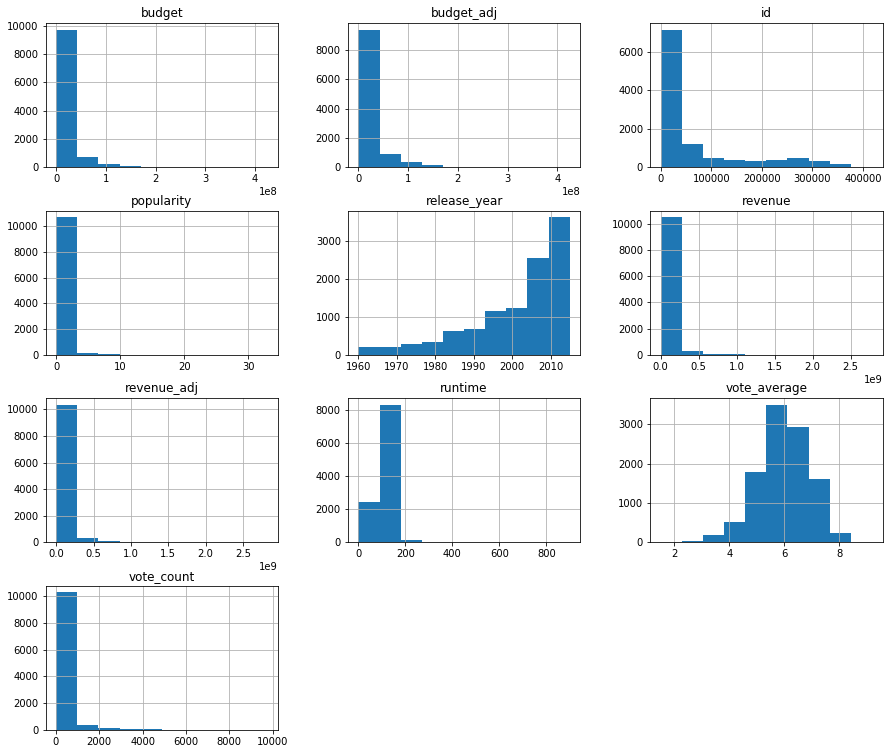

In [4]:
movie_dframe.hist(figsize=(15,13));

Since some of the standard stats provided by Pandas' describe() function were either not of interest to me or needed better formatting, I created my own function to extract what I wanted called get_simple_stats().
I also created a class with ANSI escape codes, a function for printing messages, and another function to get a simple histogram. I did this to improve the presentation of my results and make them more consistent.

In [5]:
class ffont:
    ''' 
    This class enumerates a list of ANSI Escape codes for font formating
    (ref: http://ascii-table.com/ansi-escape-sequences.php 
     and https://godoc.org/github.com/whitedevops/colors)
    '''
    normal = '\033[0m' 
    bold = '\033[1m'
    underline = '\033[4m'
    blue = '\033[94m'
    red = '\033[91m'
    black = '\033[30m'

# print a message using my "Note" format 
# defined with my "formated font" class ffont
def print_msg(message_type = '', text = ''):
    # Set message type format and print the type
    if message_type.lower() == 'info':
        print(ffont.bold,ffont.blue)
    elif message_type.lower() == 'note':
        print(ffont.bold,ffont.black)
    elif message_type.lower() == 'warning':
        print(ffont.bold,ffont.red)
    else:
        print(ffont.normal,end='')
    print(message_type + ': ',end='')
    # Set text format and print the text
    print(ffont.normal,end='')
    print(text)
    

# Get a Histogram conformed to this notebooks design format 
def get_simple_hist(data_frame, key_for_stats, figsize=(6,3), bins=10):        
    axis = data_frame.hist(column=key_for_stats,figsize=figsize,bins=bins,)

# Get a basic set of Stats
def get_simple_stats(data_frame, key_for_stats, show_basic_hist=False, bins=10 ):
    ''' This functions shows statistics for a attribute in a givent dataframe '''
    # Configure presenation
    print(ffont.bold,ffont.red)
    
    # print stats for all types
    data = data_frame[key_for_stats]
    print('Statistics for {k}:'.format(k = key_for_stats.title()))
    print(ffont.normal,end='')                  
    print('Count: {c:<} of {t}'.format(c = np.count_nonzero(data), t = len(data)))
    print('Null or Zero: {c:<}'.format(c = len(data) - np.count_nonzero(data)))
    
    # Print stats for numeric data types
    try:        
        print('Minimum: {mi:<10.2f}'.format(mi = np.min(data)))
        print('Maximum: {mx:<10.2f}'.format(mx = np.max(data)))       
        print('Mean: {m:<10.2f}'.format(m = np.mean(data)))        
        print('Std Dev: {sd:<10.2f}'.format(sd = np.std(data))) 
    except:
        print()
    
    # Optionally show a histiogram
    if show_basic_hist:
        get_simple_hist(data_frame, key_for_stats, bins=bins)

With my new functions and class in place, it was time to look for the measurable attributes. I looked for these first since they have the values used for calculations.

### Reviewing Revenue
I figured revenue would be my best metric for analysis, so I reviewed its values first.

 
Note: Revenue over all years
 
Statistics for Revenue:
Count: 4850 of 10866
Null or Zero: 6016
Minimum: 0.00      
Maximum: 2781505847.00
Mean: 39823319.79
Std Dev: 116998102.53


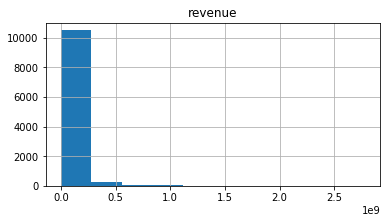

In [6]:
print_msg('Note','Revenue over all years')
get_simple_stats(movie_dframe,key_for_stats='revenue', show_basic_hist=True)

#### Examining the Revenue by Release Year
Reviewing this data, I noticed the it was very skewed and contained many zero values. This, made me wonder why there were so many zeros and did that happen with mostly older movies? 

So, I started looking at revenues based on different years. Sure enough, I saw that most revenue values with zero were associated with older films. It was obvious that newer movies had much more revenue than could be reasonably explained by the increase in theater prices or population.

I decided to do a more focused look at this data. So, I created a filtered dataframe to reduce noise and increase performance, then got some basic statistics about the revenue by release year.

 
Statistics for Release_Year:
Count: 10866 of 10866
Null or Zero: 0
Minimum: 1960.00   
Maximum: 2015.00   
Mean: 2001.32   
Std Dev: 12.81     
 
Statistics for Revenue:
Count: 4850 of 10866
Null or Zero: 6016
Minimum: 0.00      
Maximum: 2781505847.00
Mean: 39823319.79
Std Dev: 116998102.53


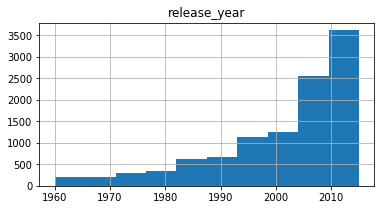

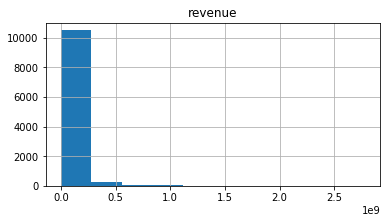

In [7]:
keep_these = ['revenue','release_year']
year_revenue_movie_dframe = movie_dframe[keep_these]
get_simple_stats(year_revenue_movie_dframe,key_for_stats='release_year', show_basic_hist=True)
get_simple_stats(year_revenue_movie_dframe,key_for_stats='revenue', show_basic_hist=True)

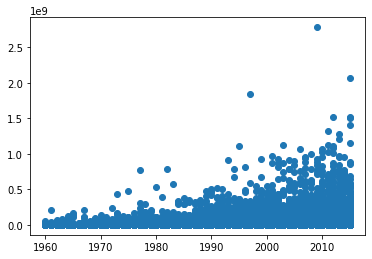

In [8]:
plt.scatter(year_revenue_movie_dframe['release_year'],year_revenue_movie_dframe['revenue'] )

I could now visualize how revenue values were strongly skewed toward the later years in the dataset and suspected that earlier years like 1966 had many more zeros.

In [9]:
year_revenue_movie_dframe 

,revenue,release_year
0,1513528810,2015
1,378436354,2015
2,295238201,2015
3,2068178225,2015
4,1506249360,2015
...,...,...
10861,0,1966
10862,0,1966
10863,0,1966
10864,0,1966


I removed the rows with zero revenue values and looked again, only to find that there were several revenue values that were disproportionately lower than the ones in 2015.

In [10]:
year_revenue_movie_dframe = year_revenue_movie_dframe[year_revenue_movie_dframe['revenue'] != 0]
year_revenue_movie_dframe

,revenue,release_year
0,1513528810,2015
1,378436354,2015
2,295238201,2015
3,2068178225,2015
4,1506249360,2015
...,...,...
10822,33736689,1966
10828,13000000,1966
10829,6000000,1966
10835,20000000,1966


### Filtering by the Release Year
After more investigation, I was confident that revenue was strongly skewed toward the year 2015 and that the total revenues dropped considerably after 2005. I now felt that if I wanted to have good comparisons between attributes that correlated to revenues, it would be best to compare revenues for movies between 2005 and 2015. So, I sliced the data by that date range making revenue more useful when calculated by attributes like actors, genre, or production companies.

In [11]:
# Filter by years
print_msg('Info', 'Revenue by Years 2005 to 2015' ) 

years=range(2005,2016)
filtered_dframe = year_revenue_movie_dframe[movie_dframe != 0].query('release_year in (@years)')
get_simple_stats(filtered_dframe,key_for_stats='revenue')

print_msg('Individule Years', '' ) 

# Filter by each year
for year in years:
    print_msg('For', year)       
    year_filter = [year]
    filtered_dframe = year_revenue_movie_dframe[movie_dframe != 0].query('release_year in (@year_filter)')
    get_simple_stats(filtered_dframe,key_for_stats='revenue')    


 
Info: Revenue by Years 2005 to 2015
 
Statistics for Revenue:
Count: 2354 of 2354
Null or Zero: 0
Minimum: 3.00      
Maximum: 2781505847.00
Mean: 101927511.27
Std Dev: 192952136.40
Individule Years: 
For: 2005
 
Statistics for Revenue:
Count: 184 of 184
Null or Zero: 0
Minimum: 10289.00  
Maximum: 895921036.00
Mean: 89765408.20
Std Dev: 141301396.84
For: 2006
 
Statistics for Revenue:
Count: 206 of 206
Null or Zero: 0
Minimum: 144.00    
Maximum: 1065659812.00
Mean: 79008443.62
Std Dev: 134114685.89
For: 2007
 
Statistics for Revenue:
Count: 195 of 195
Null or Zero: 0
Minimum: 46.00     
Maximum: 961000000.00
Mean: 99547018.82
Std Dev: 166627621.43
For: 2008
 
Statistics for Revenue:
Count: 206 of 206
Null or Zero: 0
Minimum: 3.00      
Maximum: 1001921825.00
Mean: 94328617.17
Std Dev: 152605754.71
For: 2009
 
Statistics for Revenue:
Count: 200 of 200
Null or Zero: 0
Minimum: 80.00     
Maximum: 2781505847.00
Mean: 110900852.80
Std Dev: 249997481.73
For: 2010
 
Statistics for Revenu

I noted that the standard deviation was huge since this skewed data had a "long tail." I decided I would likely want only data less than 2 standard deviation from the mean.

In [12]:
for year in years:
    print_msg('For', year)       
    year_filter = [year]
    filtered_dframe = year_revenue_movie_dframe[movie_dframe != 0].query('release_year in (@year_filter)')
    
# Remove the tail data
    mean_less_one_std =  int(abs(np.mean(filtered_dframe['revenue']) - np.std(filtered_dframe['revenue'])))
    
    print('Min', filtered_dframe['revenue'].min())
    print('Mean less two std: ', mean_less_one_std * 2) 
    print('Range between {0:,} max and {1:,} is {2:,} billion'.format(
                 int(filtered_dframe['revenue'].max()),        
                 int(filtered_dframe['revenue'].min()),
                 int(filtered_dframe['revenue'].max() - filtered_dframe['revenue'].min())/1000000000)
         )    
    print('Range between {0:,} max and {1:,} is {2:,} billion '.format(
                 int(filtered_dframe['revenue'].max()),        
                 int(mean_less_one_std * 2),
                 int(filtered_dframe['revenue'].max() - (mean_less_one_std * 2))/1000000000)
         )
    print()
 

For: 2005
Min 10289
Mean less two std:  103071976
Range between 895,921,036 max and 10,289 is 0.895910747 billion
Range between 895,921,036 max and 103,071,976 is 0.79284906 billion 

For: 2006
Min 144
Mean less two std:  110212484
Range between 1,065,659,812 max and 144 is 1.065659668 billion
Range between 1,065,659,812 max and 110,212,484 is 0.955447328 billion 

For: 2007
Min 46
Mean less two std:  134161204
Range between 961,000,000 max and 46 is 0.960999954 billion
Range between 961,000,000 max and 134,161,204 is 0.826838796 billion 

For: 2008
Min 3
Mean less two std:  116554274
Range between 1,001,921,825 max and 3 is 1.001921822 billion
Range between 1,001,921,825 max and 116,554,274 is 0.885367551 billion 

For: 2009
Min 80
Mean less two std:  278193256
Range between 2,781,505,847 max and 80 is 2.781505767 billion
Range between 2,781,505,847 max and 278,193,256 is 2.503312591 billion 

For: 2010
Min 10
Mean less two std:  154033068
Range between 1,063,171,911 max and 10 is 1.0

Oddly, the tail was so long that there seemed to be little advantage to removing the tail, at least when using revenue to compare if one movie generated proportionally more money than another. Still, if the data set was larger it would have a performance impact so I resolved to remove the tail anyway.

## Using a Priority Matrix for the Review

I performed similar tests on the other columns to identify what each one's data would be of interest, while also noting the difficulty in cleansing or validating the data.

I next defined a status of keep or remove, along with my reasons for the determination, and created a simple priority matrix to help refine my choices, as shown below.

**Note: The Difficulty and Benefit Index scales are from low(1) to high(5)

<img src="images/PriorityMatrix.jpg" alt="Priority Matrix" style="float: left; margin-right: 10px; width:300px; height:200px;" />

In [13]:
# Get Matrix data from file
print_msg('Prioritization Matrix', '')
pmatrix_dframe = pd.read_csv('./Data/Prioritization Matrix.csv')
pd.DataFrame(pmatrix_dframe)  # Display data from file
# ** Note: The Difficulty and Benefit Index scales are from low(1) to high(5)

Prioritization Matrix: 


,Attribute,Difficulty,Benefit,Status,Reasoning
0,imdb_id,1,5,Keep,Provides granular lookup.
1,popularity,2,5,Keep,Measure of interest. Has undefined scale and missing data issues. Population size unknown.
2,budget,3,3,Remove,Measure of interest. Has a lot missing data. Most data is skewed to a small set of attribute values
3,revenue,3,5,Keep,Measure of interest. Has a lot missing data. Most data is skewed to a small set of attribute values
4,original_title,1,5,Keep,Attribute if interest. Human Friendly Identifier.
5,cast,3,5,Keep,Attribute of interest. Is a collection of values
6,homepage,2,2,Remove,Attribute of interest. A two-thirds of the data is null
7,director,2,5,Keep,Attribute of interest.
8,tagline,3,3,Remove,Attribute of interest. Missing data issues.
9,keywords,3,3,Remove,Attribute of interest. Must be parsed to group. Too many variations for easy grouping.


## Completing my Review
I completed my review and made note of the following problems, solutions, and questions that might be asked with this data.

### Problems with the Data:
* p1 - Some attributes have a lot of null or zero values
* p2 - Some rows have a lot of null or zero attribute values
* p3 - Some attributes are not needed or their data is suspect
* p4 - The definition of the popularity score is not clear
* p5 - It is unknown if the inflation calculation for revenue and budget values are already included
* p6 - Denomination of the revenue and budget values are not known
* p7 - Data values vary a greatly based on release date.

### Solutions for the Problems:
* p1 - Replace nulls with zero values were appropate
* p2 - Remove rows with lots of null or zero attribute values
* p3 - Remove non needed or suspect attributes
* p4 - Remove non needed or suspect attributes
* p5 - Assume that it is not pre-calculated and keep the budget_adj and revenue_adj attributes
* p6 - Assume the values are in US dollars, but make sure to use this in relational comparisons
* p7 - Remove rows not in the last 10 years to make better comparisons

### Questions on the Data: 
Now was the time to decided which questions to ask of the data. Several came to mind:

* What are the most popular genres per decade?
* What effect does tagline have?
* What correlations are there between budget and revenue?
* Did the inclusion of homepages have any impact on popularity?
* Did runtime have any impact on popularity, and has that changed over time?
* Did production company names impact popularity and revenue?
* Which actors were most popular or generated the most revenue?

Of these, I decided to focus on the correlations between revenue vs actors and production company between the years 2005 to 2015. So, my final questions I wanted to investigate for this assignment were:

 * Which actor's movies generated the most revenue between 2005 and 2015?
 * Which production company's movies generated the most revenue between 2005 and 2015?

<a href="#toc">(Back to Table of Contents)</a>
<a id='transformations'></a>
## Data Cleaning
Before examining the questions, I wanted to filter and cleanse the data that I would need.

###  Reducing the Data
I used Pandas drop() function to remove all the attributes I did not need or want. What I wanted was defined by my questions about the revenues based on actors and production companies over the years 2005 to 2015. I also included the title as the values key identifier.

I reloaded the data from the file to make sure I was starting from the baseline and use the needed filtering to create the dataframe I needed for my reports.

In [14]:
movie_dframe = pd.read_csv('Data/tmdb-movies.csv')

keep_these = ['revenue','cast','release_year','production_companies','original_title']
movie_dframe = movie_dframe[keep_these]

print_msg('Warning','Columns are now filtered by Revenue, Cast, Release Year, Production Companies and Original Title')
movie_dframe

,revenue,cast,release_year,production_companies,original_title
0,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,2015,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Jurassic World
1,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,2015,Village Roadshow Pictures|Kennedy Miller Productions,Mad Max: Fury Road
2,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,2015,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,Insurgent
3,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,2015,Lucasfilm|Truenorth Productions|Bad Robot,Star Wars: The Force Awakens
4,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,2015,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,Furious 7
...,...,...,...,...,...
10861,0,Michael Hynson|Robert August|Lord 'Tally Ho' Blears|Bruce Brown|Chip Fitzwater,1966,Bruce Brown Films,The Endless Summer
10862,0,James Garner|Eva Marie Saint|Yves Montand|ToshirÅ Mifune|Brian Bedford,1966,Cherokee Productions|Joel Productions|Douglas & Lewis Productions,Grand Prix
10863,0,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya,1966,Mosfilm,Beregis Avtomobilya
10864,0,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru,1966,Benedict Pictures Corp.,"What's Up, Tiger Lily?"


Next, I filtered the data so that only films released between 2005 and 2015 were included. I noted that the earliest movies in that range started in 2007, 

In [15]:
# Sort by year and revenue
movie_dframe.sort_values(by=['release_year','revenue'], inplace=True, ascending=False)

# Slice by year 
years=range(2005,2016)
movie_dframe = movie_dframe.query('release_year in (@years)')

# review the results
ymin = movie_dframe['release_year'].min()
ymax = movie_dframe['release_year'].max()
print_msg('Warning','Rows are now filtered by Release Years ' + str(ymin) + ' to ' + str(ymax))
movie_dframe

,revenue,cast,release_year,production_companies,original_title
3,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,2015,Lucasfilm|Truenorth Productions|Bad Robot,Star Wars: The Force Awakens
0,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,2015,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Jurassic World
4,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,2015,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,Furious 7
14,1405035767,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo|Chris Evans|Scarlett Johansson,2015,Marvel Studios|Prime Focus|Revolution Sun Studios,Avengers: Age of Ultron
8,1156730962,Sandra Bullock|Jon Hamm|Michael Keaton|Allison Janney|Steve Coogan,2015,Universal Pictures|Illumination Entertainment,Minions
...,...,...,...,...,...
6548,0,Debbie Doebereiner|Omar Cowan|Dustin James Ashley|Phyllis Workman,2005,Magnolia Pictures|Extension 765,Bubble
6549,0,Daniel Johnston,2005,NaN,The Devil and Daniel Johnston
6551,0,Catherine Frot|AndrÃ© Dussollier|GeneviÃ¨ve Bujold|Laurent Terzieff|ValÃ©rie Kaprisky,2005,RhÃ´ne-Alpes CinÃ©ma|France2 CinÃ©ma,Mon petit doigt m'a dit...
6552,0,JosÃ© Garcia|Isabelle CarrÃ©|RenÃ©e Le Calm|FranÃ§ois Cluzet|Michel Vuillermoz,2005,NaN,Quatre Ã©toiles


Lastly, I reduced the data set by over 4 thousand rows, by removing what I considered to be films with insignificant revenue.

In [16]:
mean_less_one_std =  int(abs(np.mean(movie_dframe['revenue']) - np.std(movie_dframe['revenue'])))
movie_dframe =  movie_dframe[movie_dframe['revenue'] > mean_less_one_std * 2]
movie_dframe                          

,revenue,cast,release_year,production_companies,original_title
3,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,2015,Lucasfilm|Truenorth Productions|Bad Robot,Star Wars: The Force Awakens
0,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,2015,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Jurassic World
4,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,2015,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,Furious 7
14,1405035767,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo|Chris Evans|Scarlett Johansson,2015,Marvel Studios|Prime Focus|Revolution Sun Studios,Avengers: Age of Ultron
8,1156730962,Sandra Bullock|Jon Hamm|Michael Keaton|Allison Janney|Steve Coogan,2015,Universal Pictures|Illumination Entertainment,Minions
...,...,...,...,...,...
6213,211643158,Orlando Bloom|Eva Green|Jeremy Irons|Marton Csokas|Brendan Gleeson,2005,Studio Babelsberg|Twentieth Century Fox Film Corporation|Scott Free Productions|Kanzaman|Dune Films,Kingdom of Heaven
6280,202026112,Jim Carrey|TÃ©a Leoni|Alec Baldwin|Richard Jenkins|Angie Harmon,2005,Imagine Entertainment|Columbia Pictures Corporation|JC 23 Entertainment,Fun with Dick and Jane
6232,192452832,Peter Sallis|Helena Bonham Carter|Ralph Fiennes|Nicholas Smith|Liz Smith,2005,Aardman Animations|DreamWorks Animation,The Curse of the Were-Rabbit
6306,190320568,Adam Sandler|Chris Rock|Burt Reynolds|Michael Irvin|Nelly,2005,Paramount Pictures|Columbia Pictures Corporation|MTV Films|Happy Madison Productions|Callahan Fi...,The Longest Yard


### Cleaning the values
That still left me with null, (NaN), and zero values to transform, so I next worked on those.

In [17]:
# replace nulls with the following values
values = {'revenue': 0,
          'cast': 'Unknown',
          'release_year': 0,
          'production_companies':'Unknown',
          'original_title': 'Unknown'}
movie_dframe.fillna(value = values)

# reset the index number
movie_dframe = movie_dframe.reset_index(drop=True)  

# Show the results of the transformations
get_simple_stats(movie_dframe,key_for_stats='revenue')
movie_dframe

 
Statistics for Revenue:
Count: 364 of 364
Null or Zero: 0
Minimum: 183018522.00
Maximum: 2781505847.00
Mean: 443786815.81
Std Dev: 301129908.15


,revenue,cast,release_year,production_companies,original_title
0,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,2015,Lucasfilm|Truenorth Productions|Bad Robot,Star Wars: The Force Awakens
1,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,2015,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Jurassic World
2,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,2015,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,Furious 7
3,1405035767,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo|Chris Evans|Scarlett Johansson,2015,Marvel Studios|Prime Focus|Revolution Sun Studios,Avengers: Age of Ultron
4,1156730962,Sandra Bullock|Jon Hamm|Michael Keaton|Allison Janney|Steve Coogan,2015,Universal Pictures|Illumination Entertainment,Minions
...,...,...,...,...,...
359,211643158,Orlando Bloom|Eva Green|Jeremy Irons|Marton Csokas|Brendan Gleeson,2005,Studio Babelsberg|Twentieth Century Fox Film Corporation|Scott Free Productions|Kanzaman|Dune Films,Kingdom of Heaven
360,202026112,Jim Carrey|TÃ©a Leoni|Alec Baldwin|Richard Jenkins|Angie Harmon,2005,Imagine Entertainment|Columbia Pictures Corporation|JC 23 Entertainment,Fun with Dick and Jane
361,192452832,Peter Sallis|Helena Bonham Carter|Ralph Fiennes|Nicholas Smith|Liz Smith,2005,Aardman Animations|DreamWorks Animation,The Curse of the Were-Rabbit
362,190320568,Adam Sandler|Chris Rock|Burt Reynolds|Michael Irvin|Nelly,2005,Paramount Pictures|Columbia Pictures Corporation|MTV Films|Happy Madison Productions|Callahan Fi...,The Longest Yard


Finally, I was ready to start analysing my data for answers to my questions:

* Which actors generated the most revenue between 2005 and 2015?
* Which production company generated the most revenue between 2005 and 2015?


<a href="#toc">(Back to Table of Contents)</a>
<a id='data_analysis'></a>
## Data Analysis

I started analysing the data using revenue, cast and production companies. Since both actors and production companies were stored as multi-valued fields I created a function to split that data and provide the sums for a specified column.

In [18]:
# Create a function for analysing sums in a multi-valued columns
def split_dataframe_string_and_sum(dframe,key_to_split,key_to_sum, split_char='|'):
    '''This function creates a two-column pandas dataframe
       with the sum totals for each member of a complex string'''
    results = {}
    for i, data in dframe.iterrows():
        for key_in_process in str(data[key_to_split]).split(split_char):
            k = key_in_process
            v = data[key_to_sum]
            if k in results.keys():
                results[k] += data[key_to_sum]            
            else:
                results[k] = data[key_to_sum]
    #Create a new simple two-column data frame for analysis
    output_dframe = pd.DataFrame(list(results.items())
                                 ,columns = [key_to_split
                                 ,key_to_sum])
    return output_dframe


### Question 1 : Which actor's movies generated the most revenue between 2005 and 2015?

This question needed to be answered by associating each movie's revenue to each actor listed in its cast. Since the cast was a collection of data, I needed to separate each actor and associate a revenue value with that actor. I decided that since I had no information on how much each actor in the collection earned for each film, I decided that each actor would be mapped to the full revenue regardless of their contribution. 

 
Note: The number of actors in this data is 977
 
Statistics for Revenue:
Count: 977 of 977
Null or Zero: 0
Minimum: 183018522.00
Maximum: 6607638376.00
Mean: 826706248.50
Std Dev: 900695834.44


,actor,revenue
0,Robert Downey Jr.,"$ 6,607,638,376"
1,Johnny Depp,"$ 5,532,481,246"
2,Ralph Fiennes,"$ 5,503,841,235"
3,Emma Watson,"$ 5,412,854,134"
4,Rupert Grint,"$ 5,050,216,661"
5,Daniel Radcliffe,"$ 5,050,216,661"
6,Anne Hathaway,"$ 4,906,696,061"
7,Michelle Rodriguez,"$ 4,891,078,727"
8,Scarlett Johansson,"$ 4,726,653,643"
9,Ian McKellen,"$ 4,669,123,221"


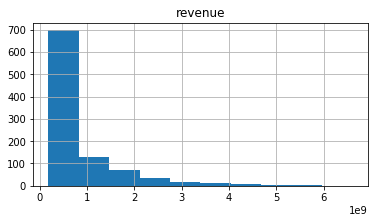

In [19]:
# Separate the individual actors from each film.
# Each actor will be ranked by the total revenue of each of their films.
revenue_by_actor_dframe = split_dataframe_string_and_sum(dframe=movie_dframe
                                                         ,key_to_split = 'cast'
                                                         ,key_to_sum = 'revenue'
                                                         ,split_char='|'
                                                         )

# Change cast to actor
revenue_by_actor_dframe = revenue_by_actor_dframe.rename(columns={'cast':'actor'},inplace=False)

# sort and reset the index numbers
revenue_by_actor_dframe = revenue_by_actor_dframe.sort_values(by=['revenue'], ascending= False)
print_msg('Note', 'The number of actors in this data is %s' % revenue_by_actor_dframe['revenue'].count())
revenue_by_actor_dframe = revenue_by_actor_dframe.reset_index(drop=True)  

# review my results
get_simple_stats(revenue_by_actor_dframe,key_for_stats='revenue',show_basic_hist=True)
revenue_by_actor_dframe.style.format({"revenue": "${:20,.0f}"})

Most of this data was so skewed to the left that having the so many outliers seemed pointless. So I decided to once again only use data two standard deviations from the mean. This removed about 90% of the actors. Making less than 10 percent of the actors the highest earners!

 
 
Statistics for Revenue:
Count: 113 of 113
Null or Zero: 0
Minimum: 1802235867.00
Maximum: 6607638376.00
Mean: 2907451941.56
Std Dev: 1013006191.32


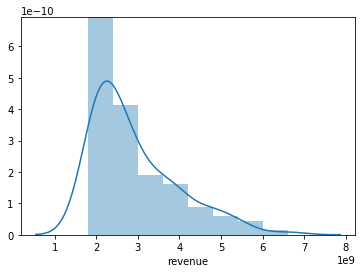

In [20]:
# Remove the tail data
rev_ref = revenue_by_actor_dframe['revenue']
two_std = np.std(rev_ref) * 2
stdv = abs(np.mean(rev_ref) - two_std)
revenue_by_actor_dframe = revenue_by_actor_dframe[revenue_by_actor_dframe['revenue'] > two_std]

# Display the resulting stats
revenue_by_actor_dframe = revenue_by_actor_dframe.reset_index(drop=True)  # reset the index number
actor_cnt = revenue_by_actor_dframe['actor'].count()
print_msg('Warning', 'The number of actors in this data is now reduced to %s' % actor_cnt)
get_simple_stats(revenue_by_actor_dframe, key_for_stats='revenue', show_basic_hist=False)
revenue_by_actor_dframe

# Use a Seaborn chart to make it easier to see the data is more normal distributed within this top earners
sns.distplot(revenue_by_actor_dframe['revenue']) 

Of these actors, who are the top 10 earners base on combined movie revenue?

In [21]:
# Top 10 actors based on movie revenue
revenue_by_actor_dframe = revenue_by_actor_dframe.reset_index(drop=True)  # reset the index number
top_ten_actors = revenue_by_actor_dframe.head(10)
top_ten_actors.style.format({"revenue": "${:20,.0f}"})

,actor,revenue
0,Robert Downey Jr.,"$ 6,607,638,376"
1,Johnny Depp,"$ 5,532,481,246"
2,Ralph Fiennes,"$ 5,503,841,235"
3,Emma Watson,"$ 5,412,854,134"
4,Rupert Grint,"$ 5,050,216,661"
5,Daniel Radcliffe,"$ 5,050,216,661"
6,Anne Hathaway,"$ 4,906,696,061"
7,Michelle Rodriguez,"$ 4,891,078,727"
8,Scarlett Johansson,"$ 4,726,653,643"
9,Ian McKellen,"$ 4,669,123,221"


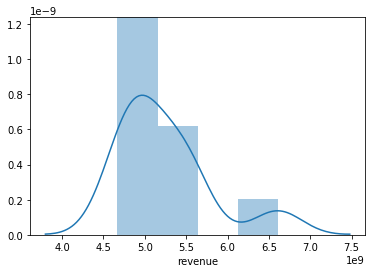

In [22]:
sns.distplot(top_ten_actors['revenue'])

The top actor in this result was Robert Downey Jr., so I looked up which movies he was in. As you can see there were 8 of them, which is a lot for a 10 year period! 

These were almost all “Super Hero” movies by Marvel Studio. It seems that landing the role of “Iron Man” with an amazing break for this actor!

In [23]:
rdj_dframe = movie_dframe[movie_dframe['cast'].str.contains('Robert Downey Jr.', regex=False)]
rdj_dframe = rdj_dframe.reset_index(drop=True)  # reset the index number
rdj_dframe.style.format({"revenue": "${:20,.0f}"})

,revenue,cast,release_year,production_companies,original_title
0,"$ 1,405,035,767",Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo|Chris Evans|Scarlett Johansson,2015,Marvel Studios|Prime Focus|Revolution Sun Studios,Avengers: Age of Ultron
1,"$ 1,215,439,994",Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|Don Cheadle|Ben Kingsley,2013,Marvel Studios,Iron Man 3
2,"$ 1,519,557,910",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chris Hemsworth|Scarlett Johansson,2012,Marvel Studios,The Avengers
3,"$ 334,615,000",Robert Downey Jr.|Jude Law|Jared Harris|Noomi Rapace|Kelly Reilly,2011,Village Roadshow Pictures|Silver Pictures|Lin Pictures|Warner Bros.|Wigram Productions,Sherlock Holmes: A Game of Shadows
4,"$ 623,933,331",Robert Downey Jr.|Gwyneth Paltrow|Don Cheadle|Scarlett Johansson|Mickey Rourke,2010,Marvel Studios,Iron Man 2
5,"$ 211,780,824",Zach Galifianakis|Robert Downey Jr.|Michelle Monaghan|Jamie Foxx|Juliette Lewis,2010,Legendary Pictures|Green Hat Films|Warner Bros.,Due Date
6,"$ 524,028,679",Robert Downey Jr.|Jude Law|Rachel McAdams|Mark Strong|Eddie Marsan,2009,Village Roadshow Pictures|Silver Pictures|Warner Bros.|Internationale Filmproduktion Blackbird Dritte|Wigram Productions,Sherlock Holmes
7,"$ 585,174,222",Robert Downey Jr.|Terrence Howard|Jeff Bridges|Gwyneth Paltrow|Leslie Bibb,2008,Marvel Studios,Iron Man
8,"$ 188,072,649",Ben Stiller|Robert Downey Jr.|Jack Black|Jay Baruchel|Brandon T. Jackson,2008,DreamWorks SKG|Goldcrest Pictures|Red Hour Films|Internationale Filmproduktion Stella-del-Sud Second,Tropic Thunder


Another interesting point was how the young actors from the Harry Potter movies all made this top 10 list!. While there were only 4 of these movies in the ten year span, those movies generated a lot of revenue! Considering each actor's age, this was also and amazing break!

In [24]:
hp_dframe = movie_dframe[movie_dframe['original_title'].str.contains('Harry Potter', regex=False)]
hp_dframe.reset_index(drop=True, inplace=True) 
hp_dframe.style.format({"revenue": "${:20,.0f}"})

,revenue,cast,release_year,production_companies,original_title
0,"$ 1,327,817,822",Daniel Radcliffe|Rupert Grint|Emma Watson|Alan Rickman|Maggie Smith,2011,Warner Bros.|Heyday Films|Moving Picture Company (MPC),Harry Potter and the Deathly Hallows: Part 2
1,"$ 954,305,868",Daniel Radcliffe|Emma Watson|Rupert Grint|Ralph Fiennes|Helena Bonham Carter,2010,Warner Bros.|Heyday Films,Harry Potter and the Deathly Hallows: Part 1
2,"$ 933,959,197",Daniel Radcliffe|Rupert Grint|Emma Watson|Tom Felton|Julie Walters,2009,Warner Bros.|Heyday Films,Harry Potter and the Half-Blood Prince
3,"$ 938,212,738",Daniel Radcliffe|Rupert Grint|Emma Watson|Michael Gambon|Ralph Fiennes,2007,Cool Music|Warner Bros.|Heyday Films|Harry Potter Publishing Rights,Harry Potter and the Order of the Phoenix
4,"$ 895,921,036",Daniel Radcliffe|Rupert Grint|Emma Watson|Ralph Fiennes|Michael Gambon,2005,Patalex IV Productions Limited|Warner Bros.|Heyday Films,Harry Potter and the Goblet of Fire


### Question 2 : Which Company's Movies generated the most revenue between 2005 and 2015?

Similar to question one, this question needed to be answered by associating each movie's revenue to each production company listed in the production_companies collection. 

Once again I decided to give equal revenue to each company listed reguardless of this participation or profit from the revenue.


In [25]:
revenue_by_company_dframe = split_dataframe_string_and_sum(dframe = movie_dframe
                                                           ,key_to_split='production_companies'
                                                           ,key_to_sum='revenue')

# Change cast to actor
revenue_by_company_dframe = revenue_by_company_dframe.rename(columns={'production_companies':'company'}
                                                             ,inplace=False)

# sort and reset the index numbers
revenue_by_company_dframe = revenue_by_company_dframe.sort_values(by=['revenue'], ascending= False)
print_msg('Note', 'The number of production companies in this data is %s' % 
                    revenue_by_company_dframe['company'].count())

revenue_by_company_dframe = revenue_by_company_dframe.reset_index(drop=True) 
revenue_by_company_dframe.style.format({"revenue": "${:20,.0f}"})



 
Note: The number of production companies in this data is 420


,company,revenue
0,Warner Bros.,"$ 22,054,929,039"
1,Walt Disney Pictures,"$ 18,428,127,396"
2,Universal Pictures,"$ 16,219,387,733"
3,Columbia Pictures,"$ 15,463,098,173"
4,Paramount Pictures,"$ 15,011,188,391"
5,Twentieth Century Fox Film Corporation,"$ 14,379,844,891"
6,Legendary Pictures,"$ 11,056,090,648"
7,Dune Entertainment,"$ 9,144,964,294"
8,DreamWorks Animation,"$ 8,937,057,404"
9,Marvel Studios,"$ 8,650,272,139"


Similar to the Actors data set there was another long tail in this data, so one again I removed it.

 
 
Statistics for Revenue:
Count: 20 of 20
Null or Zero: 0
Minimum: 4832902904.00
Maximum: 22054929039.00
Mean: 10065305980.85
Std Dev: 4946489452.64


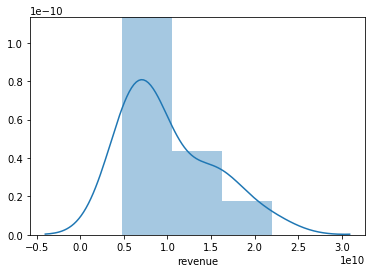

In [26]:
# Remove the tail data
rev_ref = revenue_by_company_dframe['revenue']
two_std = np.std(rev_ref) * 2
stdv = abs(np.mean(rev_ref) - two_std)
revenue_by_company_dframe = revenue_by_company_dframe[revenue_by_company_dframe['revenue'] > two_std]

# Display the resulting stats
revenue_by_company_dframe = revenue_by_company_dframe.reset_index(drop=True)  # reset the index number
company_cnt = revenue_by_company_dframe['company'].count()
print_msg('Warning', 'The number of companies in this data is now reduced to %s' % company_cnt)
get_simple_stats(revenue_by_company_dframe, key_for_stats='revenue', show_basic_hist=False)


# Use a Seaborn chart to make it easier to see the data is more normal distributed within this top earners
sns.distplot(revenue_by_company_dframe['revenue']) 

This time I saw that only 5 percent of the companyies were associated with the most revenue. The top ten here were:

In [27]:
# Top 10 companies based on movie revenue
print_msg('Note', 'The top ten movie revenue by company')
top_ten_companies_dframe = revenue_by_company_dframe.head(10)
top_ten_companies_dframe.style.format({"revenue": "${:20,.0f}"})

 
Note: The top ten movie revenue by company


,company,revenue
0,Warner Bros.,"$ 22,054,929,039"
1,Walt Disney Pictures,"$ 18,428,127,396"
2,Universal Pictures,"$ 16,219,387,733"
3,Columbia Pictures,"$ 15,463,098,173"
4,Paramount Pictures,"$ 15,011,188,391"
5,Twentieth Century Fox Film Corporation,"$ 14,379,844,891"
6,Legendary Pictures,"$ 11,056,090,648"
7,Dune Entertainment,"$ 9,144,964,294"
8,DreamWorks Animation,"$ 8,937,057,404"
9,Marvel Studios,"$ 8,650,272,139"


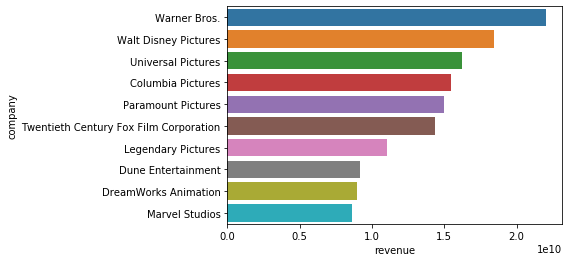

In [28]:
sns.barplot(y="company", x="revenue", data=top_ten_companies_dframe)

I now had my answer for which production companie's movies generated the most total movie revenue. The top company in this result was Warner Bros. I counted up which movies they had produced and found 47 of them in this 10 year period! An averate of 4.7 per year. 

In [29]:
columns_of_interest = ['production_companies', 'original_title']
company_by_movies_dframe = movie_dframe[columns_of_interest]

company_by_movies_dframe = pd.DataFrame(company_by_movies_dframe.production_companies.str.split('|').tolist()
                     ,index=company_by_movies_dframe.original_title).stack()

company_by_movies_dframe = company_by_movies_dframe.reset_index([0, 'original_title'])
company_by_movies_dframe.columns = ['movie_count', 'company']

company_by_movies_dframe.sort_values(by=['company'], inplace=True)
company_by_movies_dframe

count_by_company_dframe = company_by_movies_dframe.groupby('company').count()
count_by_company_dframe.sort_values(by=['movie_count'], inplace=True, ascending=False)
count_by_company_dframe[:10]

,movie_count
company,
Warner Bros.,47
Universal Pictures,41
Columbia Pictures,41
Paramount Pictures,37
Twentieth Century Fox Film Corporation,35
Walt Disney Pictures,33
Relativity Media,26
Legendary Pictures,23
Dune Entertainment,21


So, what were the movie counts corrolate with revenue?

In [30]:
#  pd.merge(left, right, how='outer', on=['key1', 'key2'])
revenue_by_count_dframe = pd.merge(count_by_company_dframe, revenue_by_company_dframe, on=['company','company'], how='inner')
revenue_by_count_dframe.style.format({"revenue": "${:20,.0f}"})
revenue_by_count_dframe = revenue_by_count_dframe.sort_values(by=['revenue'], ascending= False)
revenue_by_count_dframe

,company,movie_count,revenue
0,Warner Bros.,47,22054929039
5,Walt Disney Pictures,33,18428127396
1,Universal Pictures,41,16219387733
2,Columbia Pictures,41,15463098173
3,Paramount Pictures,37,15011188391
4,Twentieth Century Fox Film Corporation,35,14379844891
7,Legendary Pictures,23,11056090648
8,Dune Entertainment,21,9144964294
10,DreamWorks Animation,18,8937057404
14,Marvel Studios,11,8650272139


It seemed obvious now, that most of the time a company with the most movies is likely to have the highest revenue, but I decided to double check this correlation using the built- in correlation function to get the Pearson correlation coefficient. It's result at close to 1, confirmed that in this small data set there it was indeed strong! 

In [31]:
column_1 = revenue_by_count_dframe['movie_count']
column_2 = revenue_by_count_dframe['revenue']
pcc_val = column_1.corr(column_2)
pcc_val

0.9347756278868806

Other things that I would like to compare revenue too were a film's budget and popularity. Though I did not feel completely confident about its quality, the fact that their graphs are quite similar is intriguing. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185032BF788>,
      dtype=object)

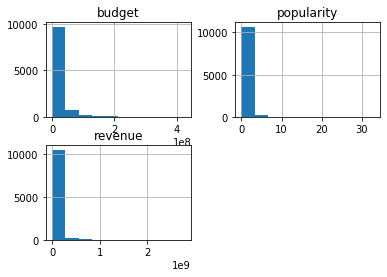

In [32]:
movie_dframe = pd.read_csv('Data/tmdb-movies.csv')
keep_these = ['revenue','budget','popularity']
movie_dframe = movie_dframe[keep_these]
movie_dframe.hist()

<a href="#toc">(Back to Table of Contents)</a>
<a id='conclusions'></a>
## Conclusions

In this report I looked at the correlation between revenue, actors, and production companies. 
I found that a small percentage of actors are part of the movies that generate the highest revenues, at least for the movies in this dataset between 2005 and 2015. 

This could indicate that certain actors are a major factor in generating more revenue, or it could be that these actors just happened to be part of the cast of a movie that generated more revenue. 

Given the fact that many of the revenues that contributed the top ten actors' totals were part of a series (ie. Iron Man/Avengers and Harry Potter) and the fact that some actors were greatly experienced while others were not, I believe that it is likely that being on the "right" movie was more important than having a certain actor in that movie. 

Still, I cannot feel too confident in this analysis, since each actor was given a movie's total revenue without regard to their participation. For example, I cannot tell which of the Harry Potter actors generated the most money or if any one of them generated more than Robert Downey Jr..   

It was also true that a small percentage of production companies produced movies with the highest revenues. Here it seemed a bit clearer that certain production companies produce movies with the highest revenue, but it could also be that the companies that produce the most films have the highest revenue. 

There was a definite correlation between the number of films and the generated revenue, which makes sense, given that the odds of having a "hit" movie are higher for a company producing 100 movies versus 1 movie.
What is less clear to me is if a company's other actions has much to do with the revenue as does its quantity of movies. Does one company do a better job of producing movies and so generates more revenue? If one company can invest the more money does it increase revenue? If a company's budget data was cleaner or each film's popularity scores were better defined, perhaps I could make a stronger correlation between those attributes, at this point I do not feel confident in the results.

What I do feel confident in saying is that a small percent of the actors and companies in this dataset are disproportionately associated with revenue. Rather that should be the case or what is the root cause of this difference is still unknown to me.

<a href="#toc">(Back to Table of Contents)</a>
<a id='references'></a>

## References:

* TMDB Movie Metadata, https://www.kaggle.com/tmdb/tmdb-movie-metadata

* Pandas Online documents, https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

* Offical Seaborn Tutorial, https://seaborn.pydata.org/tutorial.html

* Creating Histograms using Pandas, https://mode.com/example-gallery/python_histogram/

* How To Make Histogram in Python with Pandas and Seaborn?, https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/

* Python Histogram Plotting: NumPy, Matplotlib, Pandas & Seaborn, https://realpython.com/python-histograms/

* How to Drop Rows with NaN Values in Pandas DataFrame, https://datatofish.com/dropna/